In [1]:
#Import all the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.gaussian_process as gp
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import os 
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
from pandas import Series, DataFrame
from termcolor import colored as cl
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_recall_curve
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
from sklearn.naive_bayes import GaussianNB
from scipy import interp

In [2]:
#In order to run this code you'll need to change this address below to where you've saved the dataset in your local system.
filedata = pd.read_csv('C:\\Users\\hardi\\Desktop\\CSUN_Homework\\COMP_542\\ML_Project\\Project_Part_2\\Credit_Card\\credit_dataset.csv')

# making a copy of our dataset to perform all functions on
dataset = filedata.copy() 
dataset.head()

,S.no,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,38,52,8,0


In [3]:
# shape of dataset

print("Rows    :",dataset.shape[0])
print("Columns :",dataset.shape[1])

Rows    : 25134
Columns : 20


In [4]:
# checking for NULL VALUES in dataset

dataset.isna().sum()

S.no              0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [5]:
# checking the datatypes of attributes present in dataset
# Dataset have few categorical columns those who have datatype as "object"

dataset.dtypes

S.no                int64
ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE         int64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

In [6]:
# checking for unique values in dataset

dataset.nunique()

S.no              25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

0    0.98321
1    0.01679
Name: TARGET, dtype: float64


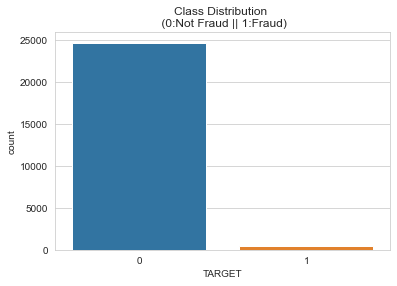

In [7]:
# checking the distribution of TARGET column

sns.countplot(dataset.TARGET).set_title("Class Distribution \n (0:Not Fraud || 1:Fraud)")
print(dataset.TARGET.value_counts(normalize=True))
plt.show()

Legitimate : 98.32 % of the dataset
Fraudulent : 1.68 % of the dataset


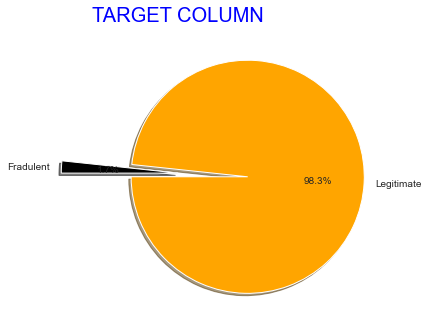

In [8]:
# Visual representation of fradulent transactions in our dataset

labels = ['Legitimate','Fradulent']
target_class_counts = dataset['TARGET'].value_counts(sort=True)
colours = ['Orange','black']
explode = (0.6,0)
plt.figure(figsize=(6,6))

plt.pie(target_class_counts, colors = colours,shadow =True,startangle=180
        ,autopct="%1.1f%%",explode=explode,labels=labels)
plt.title("TARGET COLUMN",fontsize=20,color="b")
plt.tight_layout()

print('Legitimate :', round(dataset['TARGET'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Fraudulent :', round(dataset['TARGET'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

# Hence in data there is only 1.68 % are the fraud transcation while 98.32 are valid transcation
# There are 422 Fraud transaction in 25k transaction, the dataset is highly imbalanced

# Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. 
# If we use this dataframe as the base for our predictive models and analysis we might get 
# a lot of errors and our algorithms will probably overfit since it will "assume" that 
# most transactions are not fraud. But we don't want our model to assume, we want our model to 
# detect patterns that give signs of fraud!

In [9]:
# Observing stochastical elements of the dataset like mean, no of instances, standard deviation etc.
# This will only show us these elements if the descriptive feature is numerical in nature

dataset.describe()

,S.no,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,12566.500000,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,7255.705169,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,6283.250000,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,12566.500000,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,18849.750000,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,25133.000000,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


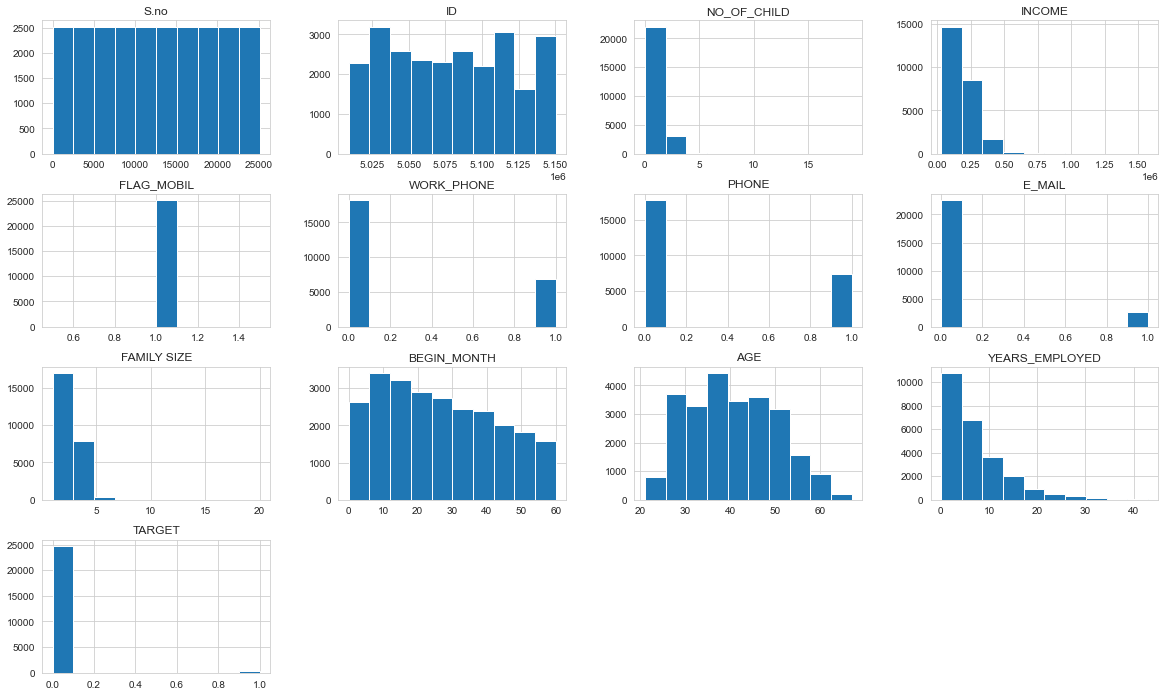

In [10]:
# Distribution of numerical features

dataset.hist(figsize=(20,12))
plt.show()

In [11]:
# Observing all categorical and binary datatypes
# This cell will print all 

dataset.describe(include="O")

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
count,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,15630,14618,16461,15622,16808,17509,22102


In [12]:
# printing all the categorical columns with their values -

cols=dataset.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(dataset[i].unique())
    print("")

Distinct_values :
 'column_name' = GENDER
['M' 'F']

Distinct_values :
 'column_name' = CAR
['Y' 'N']

Distinct_values :
 'column_name' = REALITY
['Y' 'N']

Distinct_values :
 'column_name' = INCOME_TYPE
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Distinct_values :
 'column_name' = EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Distinct_values :
 'column_name' = FAMILY_TYPE
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Distinct_values :
 'column_name' = HOUSE_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



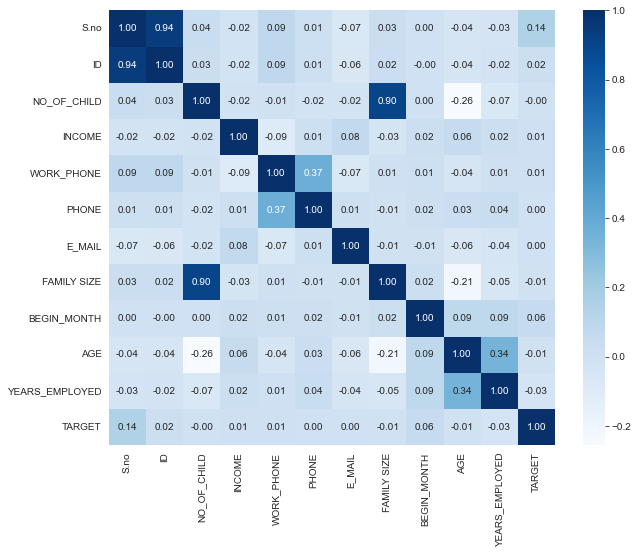

In [13]:
# dropping FLAG_MOBIL as all the values is this column is 1 and then plotting HEATMAP for our dataset
# All the Categorical values are excluded only the Numerical datatypes are present in this heatmap

plt.figure(figsize=(10,8))
sns.heatmap(dataset.drop("FLAG_MOBIL",axis=1).corr(),cmap="Blues",annot=True,fmt='.2f')
plt.show()

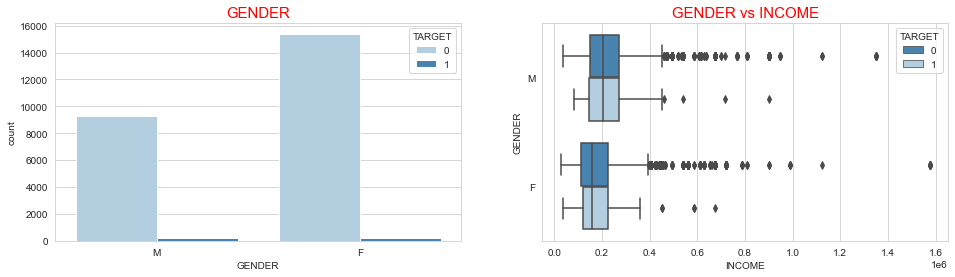

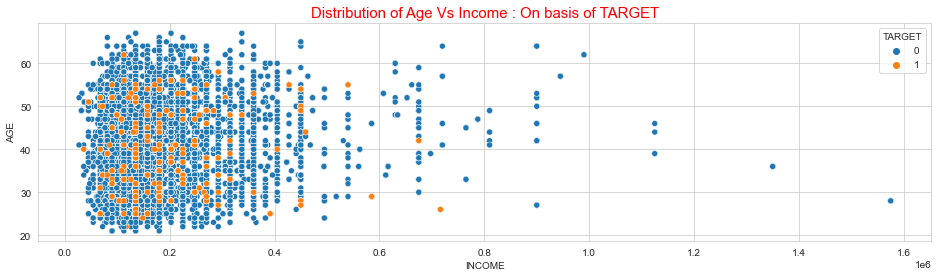

In [14]:
# Univariate and Multivariate analysis starts below
# First off, the categorical columns

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(dataset["GENDER"],hue="TARGET",data=dataset,palette="Blues")
plt.title("GENDER",fontsize=15,color="Red")
plt.subplot(122)
sns.boxplot(x="INCOME",y="GENDER",hue="TARGET",data=dataset,palette="Blues_r")
plt.title("GENDER vs INCOME",fontsize=15,color="Red")
plt.figure(figsize=(16,4))
sns.scatterplot(dataset["INCOME"],dataset["AGE"],hue=dataset["TARGET"])
plt.title("Distribution of Age Vs Income : On basis of TARGET",fontsize=15,color="Red")
plt.show()

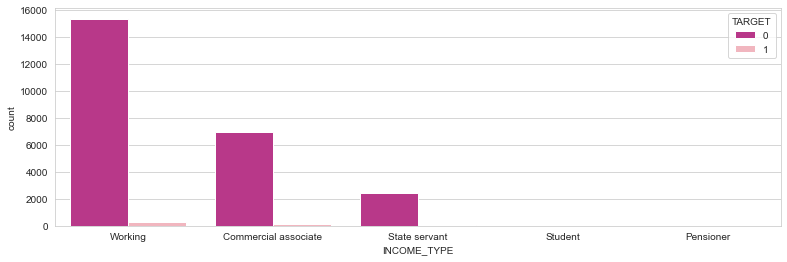

In [15]:
# INCOME TYPE

plt.figure(figsize=(13,4))
sns.countplot(dataset["INCOME_TYPE"],hue="TARGET",data=dataset,palette="RdPu_r")
plt.show()

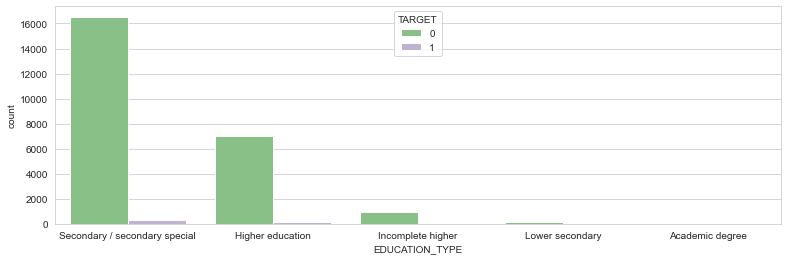

In [16]:
# EDUCATION TYPE

plt.figure(figsize=(13,4))
sns.countplot(dataset["EDUCATION_TYPE"],hue="TARGET",data=dataset,palette="Accent")
plt.show()

# From this cell we observe that People those who have their EDUCATION_TYPE as Secondary/secondray special 
# have more Fraudlent count compared to other EDUCATION type

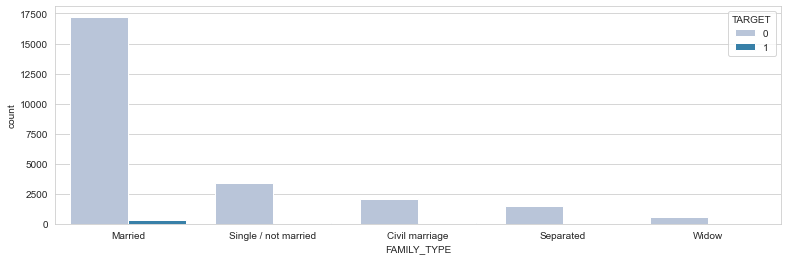

In [17]:
# FAMILY TYPE

plt.figure(figsize=(13,4))
sns.countplot(dataset["FAMILY_TYPE"],hue="TARGET",data=dataset,palette="PuBu")
plt.show()

# From this cell we observe that Married people shows more number of fraud cases as compared to other FAMILY_TYPE

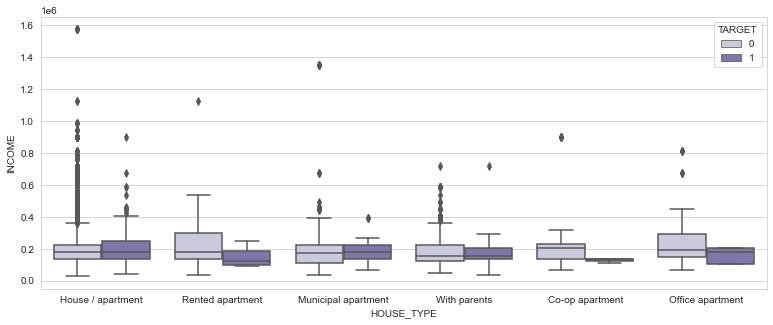

In [18]:
# HOUSE TYPE

plt.figure(figsize=(13,5))
sns.boxplot(x="HOUSE_TYPE",y="INCOME",data=dataset,hue="TARGET",palette="Purples")
plt.show()

# No real/substantial inference observed

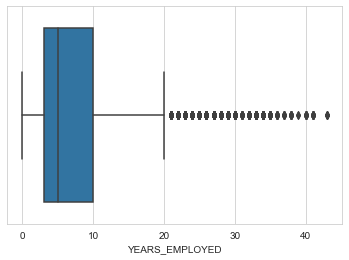

In [19]:
# YEARS EMPLOYED
# From here we start looking at outliers for the continous features
# Two continous features Age and Income are already explored above

sns.boxplot(dataset["YEARS_EMPLOYED"])
plt.show()

# YEARS_EMPLOYED show some outliers which we will deal with in the next cell

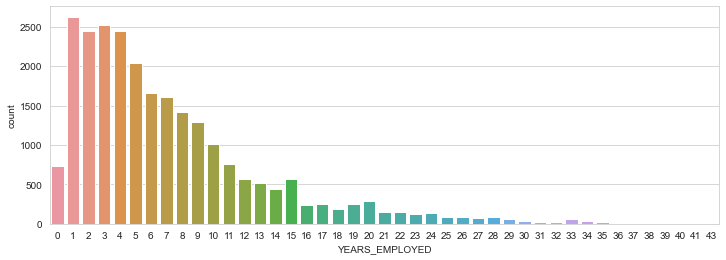

In [20]:
# To deal with outliers first we have a look at the graphical representation of this datatype

plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"])
plt.show()

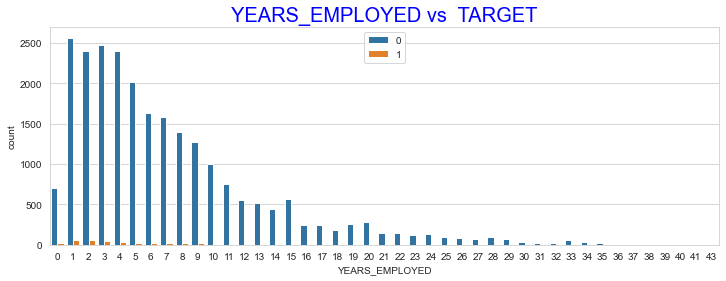

In [21]:
# Now we look at the correlation this descriptive feature has with the TARGET feature.

plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"],hue="TARGET",data=dataset)
plt.title("YEARS_EMPLOYED vs  TARGET",fontsize=20,color="BLUE")
plt.legend()
plt.show()

# We infer the following from this graph: Most of the employees working experience lies 
# between 1yrs to 15yrs. Countplot is more clustered in this region Fraudlent entries also lies in this region

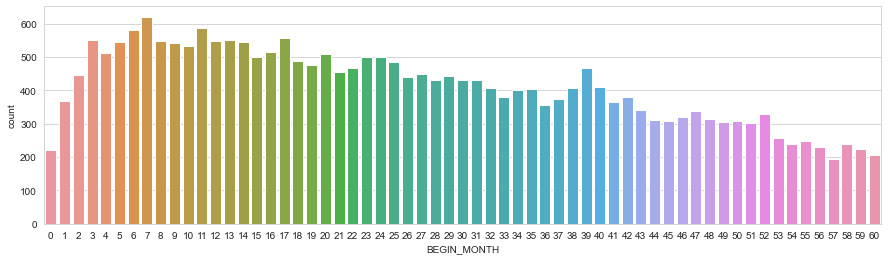

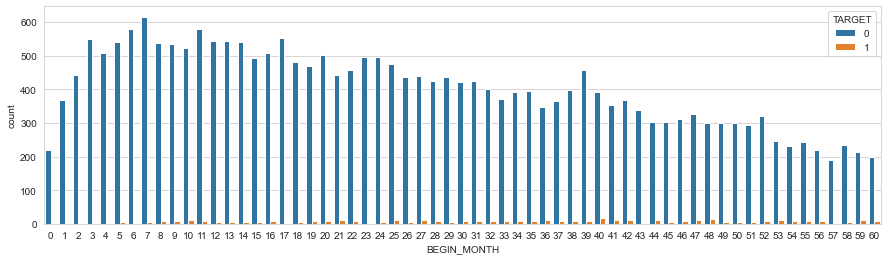

In [22]:
# BEGIN MONTH
# checking the frequency of BEGIN_MONTH

plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"])
plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"],hue="TARGET",data=dataset)
plt.show()

# No outliers or any other anomaly observed here

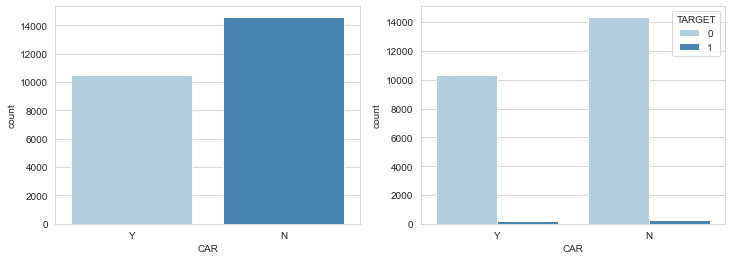

In [23]:
# CAR

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(dataset["CAR"],palette="Blues")
plt.subplot(122)
sns.countplot(dataset.CAR,hue="TARGET",data=dataset,palette="Blues")
plt.show()

# Majority of people do not have a CAR.

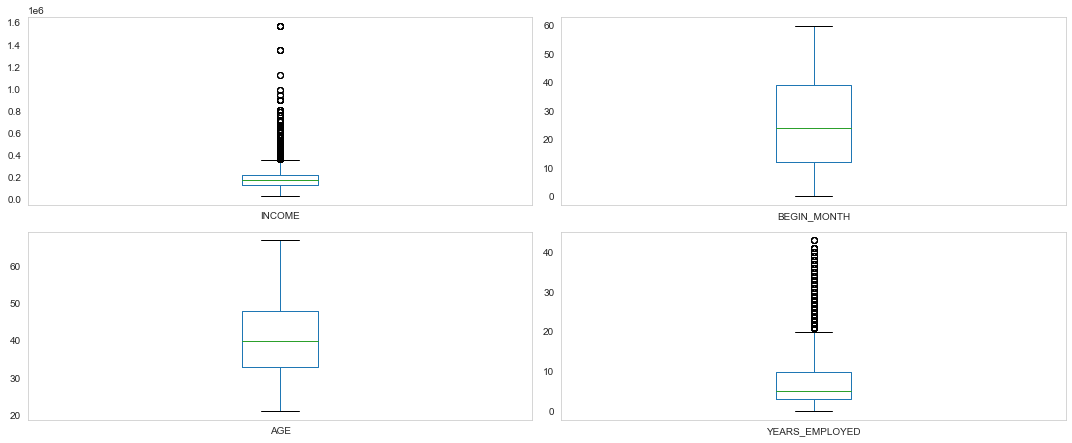

In [24]:
# Now we start the 'Data Processing' part
# First we must detect and deal with outliers
# We'll start with the continous features

# these columns have continuous values other are having discrete entries
cont=dataset[["INCOME","BEGIN_MONTH","AGE","YEARS_EMPLOYED"]]

# Using Boxplot to detect the outliers-
plt.figure(figsize=(15,12))

for i ,col in enumerate(list(cont.columns)):
    plt.subplot(4,2,i+1)
    cont.boxplot(col)
    plt.grid()
    plt.tight_layout()
    

# The box indicates the interquartile range, that is, the top line of the box is the third quartile and the bottom 
# line of the box is the second quartile. The line separating the second and third quartiles indicates the median.
# The lines outside of the box indicate the outer-quartiles (first and fourth).
# Any data outside these boundaries is an outlier

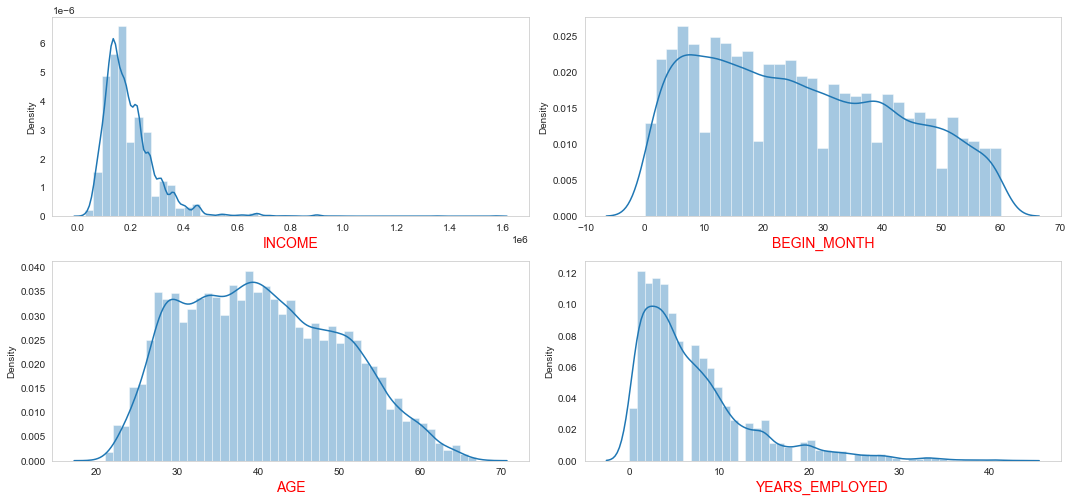

In [25]:
# Checking the two dimensional plot of the continous festures
# Histogram

plt.figure(figsize=(15,10))

for i ,cols in enumerate(list(cont.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(cont[cols])
    plt.xlabel(cols,fontsize=14,color="Red")
    plt.grid()
    plt.tight_layout()
    
# INCOME and YEARS_EMPLOYED columns does not show normal distribution Graphs of both the columns are right skewed

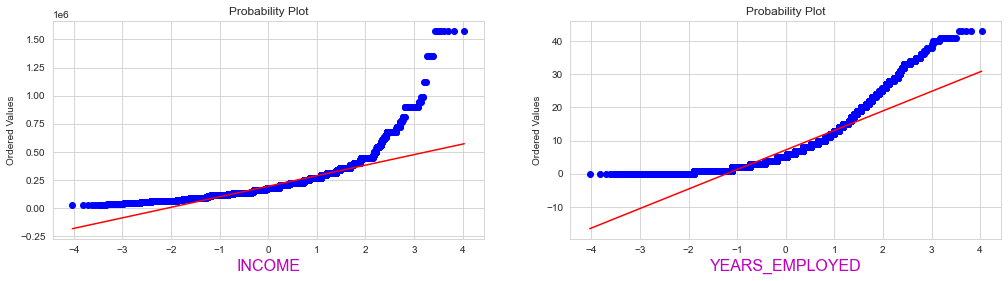

In [26]:
# Dealing with features that do not show normal distribution

plt.figure(figsize=(17,4))

plt.subplot(121)
res=stats.probplot(dataset.INCOME,plot=plt,dist="norm")
plt.xlabel("INCOME",fontsize=16,color="m")

plt.subplot(122)
res=stats.probplot(dataset.YEARS_EMPLOYED,plot=plt,dist="norm")
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")

plt.show()

# INCOME :- Q-Q plot show all the points are not distributed uniformly
# YEARS_EMPLOYED :- As compared to INCOME, YEARS_EMPLOYED shows more disturbance in distribution.
# It has few outliers because high earning people also present in dataset.

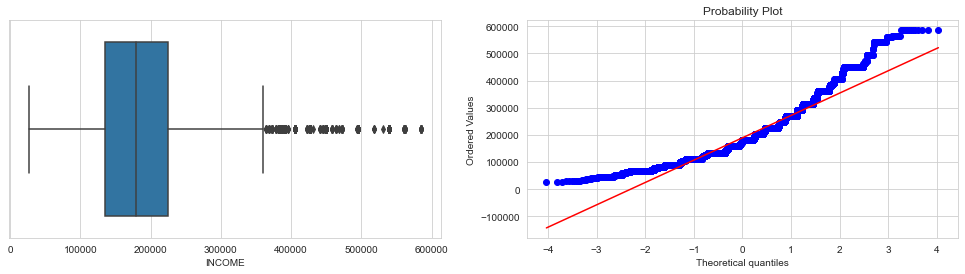

In [27]:
# Dealing with INCOME first
# removing values those are greater then 600000 to normalize our dataset

dataset=dataset[dataset['INCOME'] < 600000]

plt.figure(figsize=(17,4))

plt.subplot(121)
sns.boxplot(dataset.INCOME)

plt.subplot(122)
res=stats.probplot(dataset.INCOME,plot=plt,dist="norm")

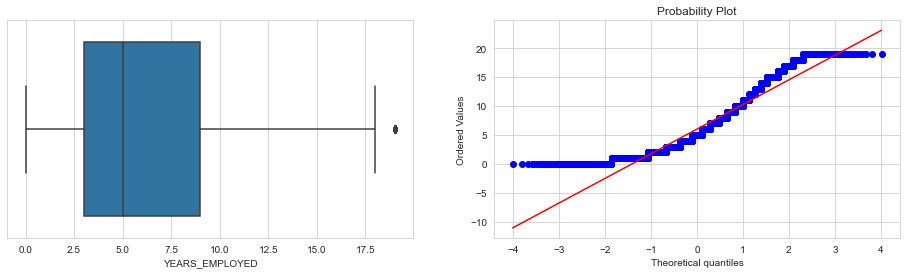

In [28]:
# Dealing with YEARS EMPLOYED next
# Dropping the values greater the 20 for normalization of dataset

dataset=dataset[dataset['YEARS_EMPLOYED'] < 20]

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(dataset.YEARS_EMPLOYED)
plt.subplot(122)
res=stats.probplot(dataset.YEARS_EMPLOYED,plot=plt,dist="norm")

# Boxplot shows that now few values are present. We cannot drop all the values that does not show normal distribution,
# dropping values can cause loss of data which is not required. 
# After removing the outlier values the Q-Q plot shows now more values are alinged. In both the plots

In [29]:
# dropping FLAG_MOBIL from our dataset as all the values is this column are always 1
# dropping column 1 and 2 as they are unneccesary. These columns are ID and Serial number.

dataset.drop(columns={"ID"},inplace=True,axis=1)
dataset.drop(columns={"S.no"},inplace=True,axis=1)
dataset.drop("FLAG_MOBIL",inplace=True,axis=1)

In [30]:
# converting float data types to INT64 datatype

floats=["INCOME","FAMILY SIZE","BEGIN_MONTH"]

for i in floats:
    dataset[i]=dataset[i].astype("int64")

In [31]:
# Now we run the label encoder
# This process is simply converting the labels from textual data format to a numeric format.

labels=["GENDER","CAR","REALITY","INCOME_TYPE","EDUCATION_TYPE","HOUSE_TYPE","FAMILY_TYPE"]
label=LabelEncoder()

for i in labels:
    dataset[i]=label.fit_transform(dataset[i])

In [32]:
# dataset visual verification after using LabelEncoder

dataset.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500,4,4,1,1,0,0,0,2,29,59,3,0
1,0,0,1,0,270000,0,4,3,1,0,1,1,1,4,52,8,0
2,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
3,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
4,0,0,1,0,270000,0,4,3,1,0,1,1,1,38,52,8,0


In [33]:
# Checking the correlation of the dataset

dataset.corr()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
GENDER,1.000000,0.335480,-0.038093,0.007133,0.215555,0.054693,0.049496,-0.048857,0.050642,0.016151,-0.022394,-0.029970,0.033294,-0.004875,-0.088454,-0.074834,0.018699
CAR,0.335480,1.000000,0.010930,0.060831,0.213636,0.001591,-0.072167,-0.098587,0.005645,-0.024479,-0.025668,0.001649,0.104713,0.026117,-0.052365,-0.002096,-0.003231
REALITY,-0.038093,0.010930,1.000000,0.021140,0.030626,-0.029387,0.008892,0.001889,-0.176601,-0.207793,-0.060026,0.062439,0.021296,-0.011152,0.089129,-0.008422,-0.022924
NO_OF_CHILD,0.007133,0.060831,0.021140,1.000000,-0.034394,0.041044,-0.024205,-0.161934,0.004803,-0.000719,-0.013026,-0.016472,0.905458,0.006449,-0.238263,0.015776,-0.003085
INCOME,0.215555,0.213636,0.030626,-0.034394,1.000000,-0.151565,-0.201597,0.036170,-0.007361,-0.098489,0.006639,0.068385,-0.045235,0.031696,0.053488,0.044452,0.011164
INCOME_TYPE,0.054693,0.001591,-0.029387,0.041044,-0.151565,1.000000,0.105883,-0.012714,-0.008985,0.079314,0.002694,-0.042644,0.043303,-0.005473,0.001142,0.024137,-0.001414
EDUCATION_TYPE,0.049496,-0.072167,0.008892,-0.024205,-0.201597,0.105883,1.000000,-0.001881,-0.029707,0.007729,-0.054091,-0.105592,-0.019444,-0.013024,0.144156,0.020961,-0.010094
FAMILY_TYPE,-0.048857,-0.098587,0.001889,-0.161934,0.036170,-0.012714,-0.001881,1.000000,0.040743,-0.048622,-0.026204,-0.013375,-0.520295,-0.042932,0.011540,-0.033102,0.022860
HOUSE_TYPE,0.050642,0.005645,-0.176601,0.004803,-0.007361,-0.008985,-0.029707,0.040743,1.000000,0.002463,-0.024382,-0.007611,-0.018643,-0.028966,-0.181886,-0.056428,0.001291
WORK_PHONE,0.016151,-0.024479,-0.207793,-0.000719,-0.098489,0.079314,0.007729,-0.048622,0.002463,1.000000,0.364953,-0.064787,0.016321,0.013210,-0.045377,0.012513,0.007058


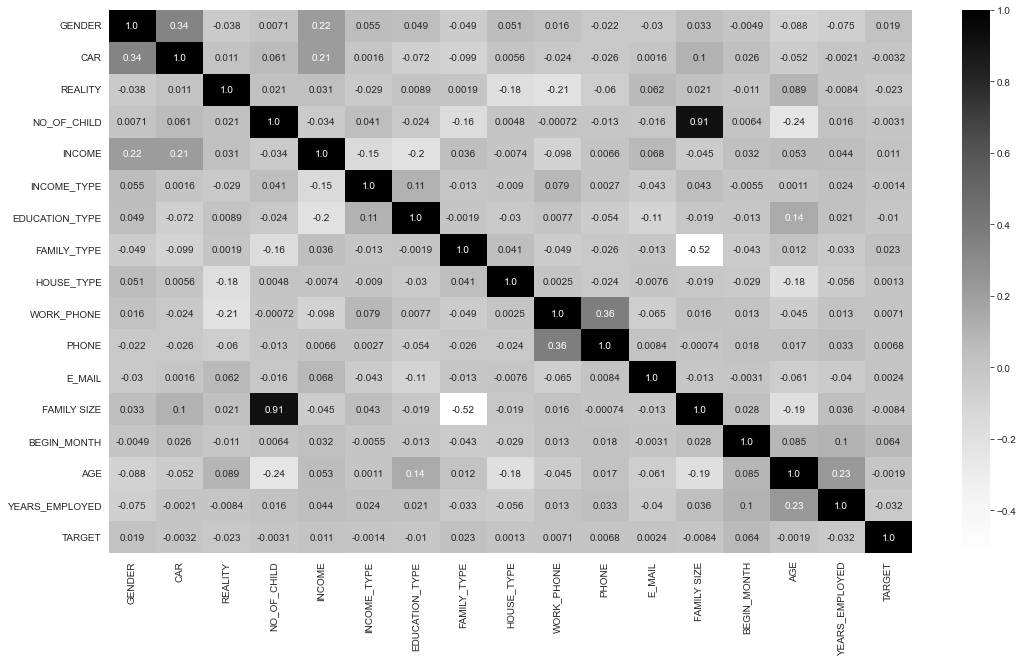

In [34]:
# Plotting the heatmap for our dataset

plt.figure(figsize=(18,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.2',cmap="Greys")
plt.show()

In [35]:
# FAMILY_SIZE and NO_OF_CHILD are highly correlated to each other so we can drop one feature form the dataset
# We choose to drop no_of_children here

dataset.drop('NO_OF_CHILD',inplace=True,axis=1)

In [36]:
# Now the 'Feature Selection' part starts
# seperating datasets and taking first look at them

descriptive_features = dataset.drop("TARGET",axis=1)
target_feature=dataset.TARGET

print("descriptive_features :",descriptive_features.shape)
print("target_feature :",target_feature.shape)

descriptive_features : (23361, 15)
target_feature : (23361,)


In [37]:
# Using Extra Tree Classifier as a means of finding the most important descriptive feature.

model=ExtraTreeClassifier()
model.fit(descriptive_features, target_feature)

ExtraTreeClassifier()

In [38]:
# printing feature importances

print(model.feature_importances_)

[0.02108191 0.02289661 0.01342815 0.14271173 0.03464668 0.03408327
 0.0523683  0.01833684 0.01147661 0.02125339 0.01162717 0.06207162
 0.3293288  0.11766872 0.10702021]


In [39]:
# Using a variable feat to store feature importances 

feat=pd.Series(model.feature_importances_,index=descriptive_features.columns)

# Displaying feature importances

feats=feat.to_frame().reset_index()
feats.columns=["Features","Scores"]
features=feats.sort_values(by="Scores",ascending=False)
top_features=features.nlargest(12,"Scores")
top_features

,Features,Scores
12,BEGIN_MONTH,0.329329
3,INCOME,0.142712
13,AGE,0.117669
14,YEARS_EMPLOYED,0.107020
11,FAMILY SIZE,0.062072
6,FAMILY_TYPE,0.052368
4,INCOME_TYPE,0.034647
5,EDUCATION_TYPE,0.034083
1,CAR,0.022897
9,PHONE,0.021253


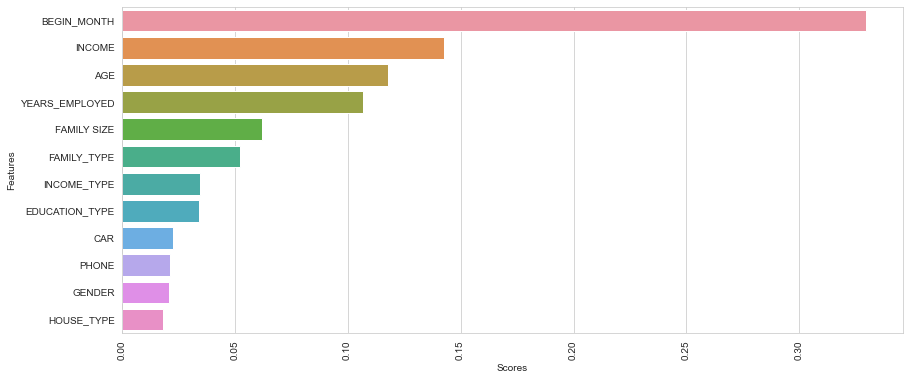

In [40]:
# Visual representation of feature importances

plt.figure(figsize=(14,6))
sns.barplot(y="Features",x="Scores",data=top_features)
plt.xticks(rotation=90)
plt.show()

In [41]:
# Storing dataset in a new variable as we are about to change it's shape and add / expand descriptive features.

dataset_expanded=dataset[["GENDER","BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE"
                  ,"PHONE","HOUSE_TYPE","EDUCATION_TYPE","TARGET"]]

dataset_expanded.shape

(23361, 13)

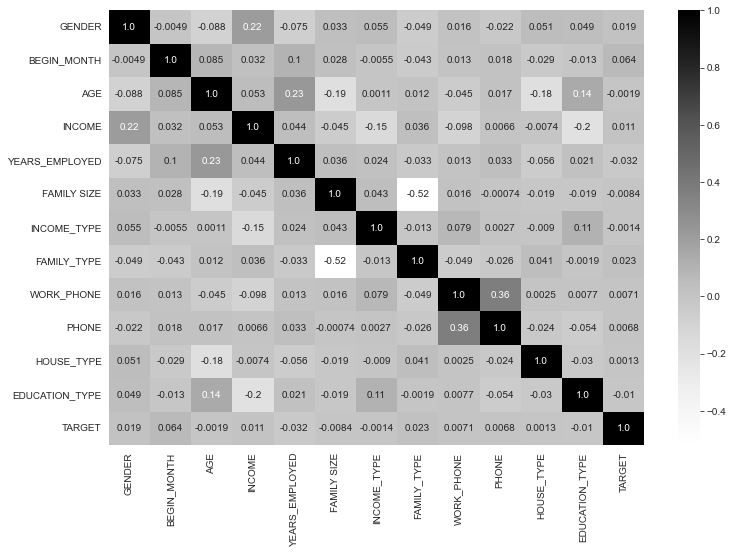

In [42]:
# Plotting heatmap for variable new_data

plt.figure(figsize=(12,8))
sns.heatmap(dataset_expanded.corr(), fmt='.2', annot=True, cmap="Greys")
plt.show()

In [43]:
# Now we'll introduce dummy variables for our categirical features

dataset_expanded.head()

,GENDER,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,FAMILY SIZE,INCOME_TYPE,FAMILY_TYPE,WORK_PHONE,PHONE,HOUSE_TYPE,EDUCATION_TYPE,TARGET
0,1,29,59,112500,3,2,4,1,0,0,1,4,0
1,0,4,52,270000,8,1,0,3,0,1,1,4,0
2,0,26,52,270000,8,1,0,3,0,1,1,4,0
3,0,26,52,270000,8,1,0,3,0,1,1,4,0
4,0,38,52,270000,8,1,0,3,0,1,1,4,0


In [44]:
# This will create a separate column for the subclasses of below mentioned categorical columns

dummy_data=pd.get_dummies(dataset_expanded, columns={"GENDER","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE","PHONE",
                                            "HOUSE_TYPE","EDUCATION_TYPE"},drop_first=True)

# shape of the dataset after creating dummy variables

dummy_data.shape

(23361, 34)

In [45]:
# Display new dataset to verify

dummy_data.head()

,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,TARGET,HOUSE_TYPE_1,HOUSE_TYPE_2,HOUSE_TYPE_3,HOUSE_TYPE_4,HOUSE_TYPE_5,...,FAMILY SIZE_5,FAMILY SIZE_6,FAMILY SIZE_7,FAMILY SIZE_9,FAMILY SIZE_15,FAMILY SIZE_20,EDUCATION_TYPE_1,EDUCATION_TYPE_2,EDUCATION_TYPE_3,EDUCATION_TYPE_4
0,29,59,112500,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,52,270000,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26,52,270000,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,26,52,270000,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,38,52,270000,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


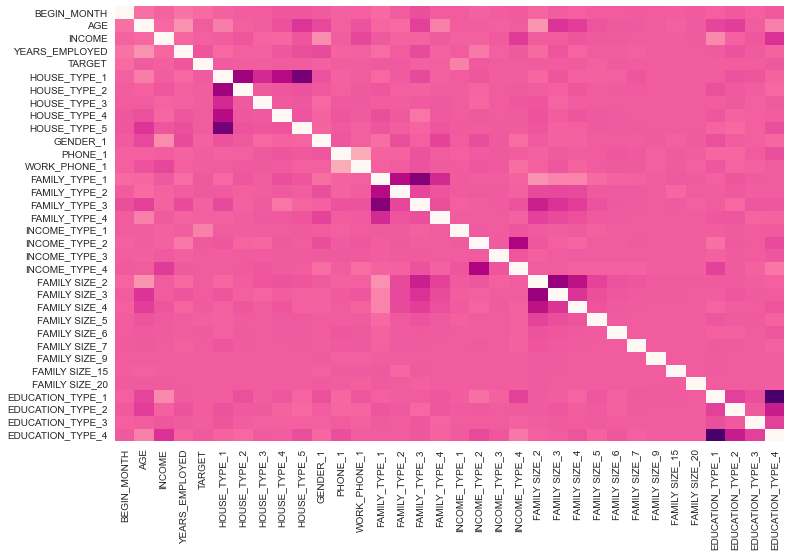

In [46]:
# checking the heatmap of the new dataset

plt.figure(figsize=(12,8))
sns.heatmap(dummy_data.corr(),fmt='.2',cbar=False,cmap="RdPu_r")
plt.show()

In [47]:
# Now we start the Sampling Methods !!
# Our goal is to perform oversampling using the SMOTE algorithm to improve our model prediction.
# The SMOTE Algorithm creates a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions.

# Oversampling:- it means using replicating the data of minority class (fraud class) so that we can have a balanced data
# SMOTE : - it is also a type of oversampling but in this we will make the synthetic example of Minority data 
# and will give as a balanced data

# SMOTE (Synthetic minority oversampling technique)
# SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. 
# The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b 
# to form a line segment in the feature space. The synthetic instances are generated as a convex combination 
# of the two chosen instances a and b.

data_minority = filedata[filedata["TARGET"] == 1]
data_majority = filedata[filedata["TARGET"] == 0]
print("Data_majority :",data_majority.shape)
print("Data_minority :",data_minority.shape)

# creating a new dataset for oversampled data
data_oversampled = dummy_data.copy()

# Observing data before applying SMOTE
data_oversampled.TARGET.value_counts()

Data_majority : (24712, 20)
Data_minority : (422, 20)


0    22957
1      404
Name: TARGET, dtype: int64

In [48]:
# setting TARGET variable SMOTE

# ---------------------------------------------------
# Note: change made here: fit_sample -> fit_resample.

smote_descriptive_features, smote_target_feature = SMOTE().fit_resample(data_oversampled.drop("TARGET",axis=1), data_oversampled.TARGET)

# Checking the Shape of dataset after using SMOTE

print("X",smote_descriptive_features.shape)
print("y",smote_target_feature.shape)

X (45914, 33)
y (45914,)


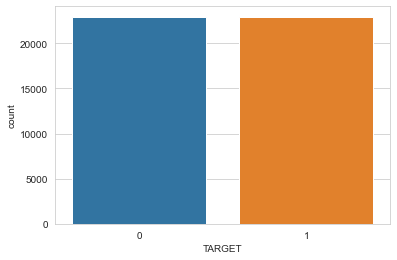

In [49]:
# Visual check to see level of imbalance

sns.countplot(smote_target_feature)
plt.show()

# we now see that our dataset is balanced !!

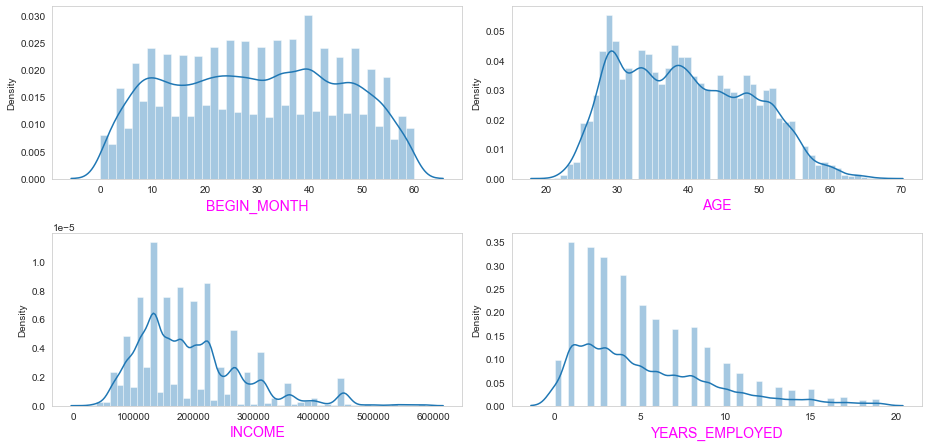

In [50]:
# considering the continuous variables -

smote_descriptive_features_continuous=smote_descriptive_features[["BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED"]]

# distribution of the continuous variables after sampling the data using SMOTE -

plt.figure(figsize=(13,9))

for i,col in enumerate((smote_descriptive_features_continuous.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(smote_descriptive_features_continuous[col])
    plt.xlabel(col,fontsize=14,color="Magenta")
    plt.grid()
    plt.tight_layout()

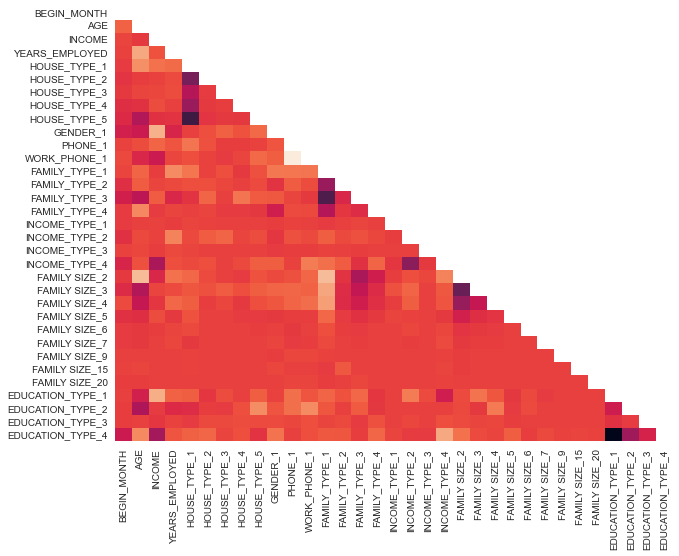

In [51]:
# Plotting heatmap of oversampled dataset

plt.figure(figsize=(10,8))
matrix = np.triu(smote_descriptive_features.corr())
sns.heatmap(smote_descriptive_features.corr(),mask=matrix,cbar=False)
plt.show()

In [52]:
# Now we'll begin applying classification models to over_sampled data to check prediction scores.
# Performing a test-train-split over our dataset

train_descriptive_features_oversampled, test_descriptive_features_oversampled, train_target_feature_oversampled, test_target_feature_oversampled = train_test_split(smote_descriptive_features, smote_target_feature, test_size = 0.25, random_state = 99)

In [53]:
# size of data after spliting

print("train_descriptive_features_oversampled : ",train_descriptive_features_oversampled.shape, "\ntrain_target_feature_oversampled : ",train_target_feature_oversampled.shape)
print("test_descriptive_features_oversampled : ",test_descriptive_features_oversampled.shape, "\ntest_target_feature_oversampled : ",test_target_feature_oversampled.shape)

train_descriptive_features_oversampled :  (34435, 33) 
train_target_feature_oversampled :  (34435,)
test_descriptive_features_oversampled :  (11479, 33) 
test_target_feature_oversampled :  (11479,)


In [54]:
# Random Forest 
# Classifier - 1

random_model_oversampled=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=2, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Change made here !!
# Attribute min_impurity split removed

In [55]:
# Here we apply classifier to the dataset

random_model_oversampled.fit(train_descriptive_features_oversampled,train_target_feature_oversampled)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=50, n_estimators=700)

In [56]:
# This cell saves our prediction in the variable random_predictions_oversampled
# This cell will then print the prediction results

random_predictions_oversampled = random_model_oversampled.predict(test_descriptive_features_oversampled)
print(metrics.classification_report(random_predictions_oversampled,test_target_feature_oversampled))

# Notice the increased performance as compared to part_2 submission.

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5855
           1       0.96      0.99      0.98      5624

    accuracy                           0.98     11479
   macro avg       0.98      0.98      0.98     11479
weighted avg       0.98      0.98      0.98     11479



In [57]:
# Printing precision

print(metrics.precision_score(random_predictions_oversampled,test_target_feature_oversampled))

0.9639764461378594


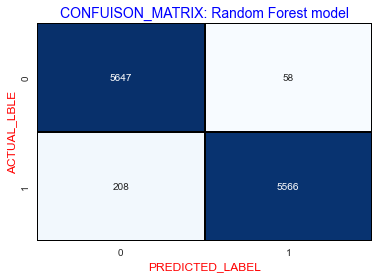

In [58]:
# Storing prediction results in a list/Array ... confirm this part

model_scores_oversampled = {}
model_scores_oversampled["Random_Forest"] ={}
model_scores_oversampled["Random_Forest"]["Precision"]=metrics.precision_score(random_predictions_oversampled,test_target_feature_oversampled)*100
model_scores_oversampled["Random_Forest"]["Recall"]=metrics.recall_score(random_predictions_oversampled,test_target_feature_oversampled)*100
model_scores_oversampled["Random_Forest"]["Accuracy"]=metrics.accuracy_score(random_predictions_oversampled,test_target_feature_oversampled)*100

# Printing the Confusion Matrix

sns.heatmap(metrics.confusion_matrix(test_target_feature_oversampled,random_predictions_oversampled),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX: Random Forest model",fontsize=14,color="b")
plt.show()

In [59]:
# Decision Trees
# Classifier - 2

# Initiating classifier

tree_model=DecisionTreeClassifier()
tree_model.fit(train_descriptive_features_oversampled,train_target_feature_oversampled)

DecisionTreeClassifier()

In [60]:
# Saving prediction results in a variable

tree_predictions=tree_model.predict(test_descriptive_features_oversampled)

# Printing prediction results

print(metrics.classification_report(test_target_feature_oversampled,tree_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5705
           1       0.98      0.99      0.98      5774

    accuracy                           0.98     11479
   macro avg       0.98      0.98      0.98     11479
weighted avg       0.98      0.98      0.98     11479



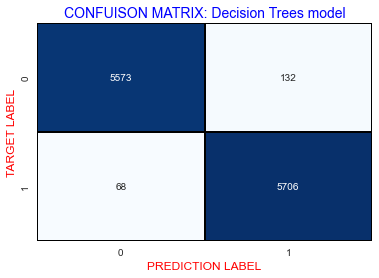

In [61]:
# Saving prediction results in the same variable we used earlier ?

model_scores_oversampled["Decision_Tree"] ={}
model_scores_oversampled["Decision_Tree"]["Precision"]=metrics.precision_score(tree_predictions,test_target_feature_oversampled)*100
model_scores_oversampled["Decision_Tree"]["Recall"]=metrics.recall_score(tree_predictions,test_target_feature_oversampled)*100
model_scores_oversampled["Decision_Tree"]["Accuracy"]=metrics.accuracy_score(tree_predictions,test_target_feature_oversampled)*100

# Printing the confusion matrix

sns.heatmap(metrics.confusion_matrix(test_target_feature_oversampled,tree_predictions),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTION LABEL",fontsize=12,color='r')
plt.ylabel("TARGET LABEL",fontsize=12,color='r')
plt.title("CONFUISON MATRIX: Decision Trees model",fontsize=14,color="b")
plt.show()

Decision Trees: AUROC = 0.673
KNN: AUROC = 0.713
Logistic Regression: AUROC = 0.519
SVM: AUROC = 0.500
Random Forest: AUROC = 0.775
Gaussian NB: AUROC = 0.682


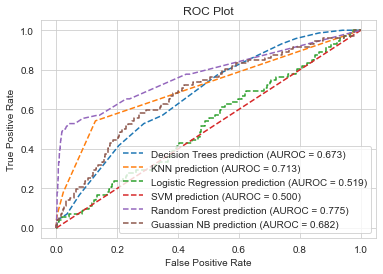

In [64]:
# Test cell for generating ROC curve of all classifiers used initially
# Generating Initial Results section

# Test Cell
# Generating ROC curves of all 6 classifiers at once 

# Instantiating all classifiers

model_1 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model_2 = KNeighborsClassifier(n_neighbors = 10)
model_3 = LogisticRegression()
model_4 = SVC()
model_5 = RandomForestClassifier(max_depth = 50)
model_6 = GaussianNB()

# Splitting dataset
train_descriptive_features, test_descriptive_features, train_target_feature, test_target_feature = train_test_split(descriptive_features, target_feature, test_size = 0.20)

# getting prediction probability score
model_1.fit(train_descriptive_features,train_target_feature)
model_1_prediction = model_1.predict_proba(test_descriptive_features)
model_2.fit(train_descriptive_features,train_target_feature)
model_2_prediction = model_2.predict_proba(test_descriptive_features)
model_3.fit(train_descriptive_features,train_target_feature)
model_3_prediction = model_3.predict_proba(test_descriptive_features)
model_4.fit(train_descriptive_features,train_target_feature)
model_4_prediction = model_4.predict(test_descriptive_features)
model_5.fit(train_descriptive_features,train_target_feature)
model_5_prediction = model_5.predict_proba(test_descriptive_features)
model_6.fit(train_descriptive_features,train_target_feature)
model_6_prediction = model_6.predict_proba(test_descriptive_features)

# Keep positive outcomes
model_1_prediction = model_1_prediction[:, 1]
model_2_prediction = model_2_prediction[:, 1]
model_3_prediction = model_3_prediction[:, 1]
#model_4_prediction = model_4_prediction[:, 1]
model_5_prediction = model_5_prediction[:, 1]
model_6_prediction = model_6_prediction[:, 1]

# Calculate AUROC - area under ROC curve
model_1_auc = roc_auc_score(test_target_feature, model_1_prediction)
model_2_auc = roc_auc_score(test_target_feature, model_2_prediction)
model_3_auc = roc_auc_score(test_target_feature, model_3_prediction)
model_4_auc = roc_auc_score(test_target_feature, model_4_prediction)
model_5_auc = roc_auc_score(test_target_feature, model_5_prediction)
model_6_auc = roc_auc_score(test_target_feature, model_6_prediction)

# Printing AUROC score
print('Decision Trees: AUROC = %.3f' % (model_1_auc))
print('KNN: AUROC = %.3f' % (model_2_auc))
print('Logistic Regression: AUROC = %.3f' % (model_3_auc))
print('SVM: AUROC = %.3f' % (model_4_auc))
print('Random Forest: AUROC = %.3f' % (model_5_auc))
print('Gaussian NB: AUROC = %.3f' % (model_6_auc))

# Calculate ROC curve
model_1_fpr, model_1_tpr, _ = roc_curve(test_target_feature, model_1_prediction)
model_2_fpr, model_2_tpr, _ = roc_curve(test_target_feature, model_2_prediction)
model_3_fpr, model_3_tpr, _ = roc_curve(test_target_feature, model_3_prediction)
model_4_fpr, model_4_tpr, _ = roc_curve(test_target_feature, model_4_prediction)
model_5_fpr, model_5_tpr, _ = roc_curve(test_target_feature, model_5_prediction)
model_6_fpr, model_6_tpr, _ = roc_curve(test_target_feature, model_6_prediction)

# Plot the ROC curve
plt.plot(model_1_fpr, model_1_tpr, linestyle='--', label='Decision Trees prediction (AUROC = %0.3f)' % model_1_auc)
plt.plot(model_2_fpr, model_2_tpr, linestyle='--', label='KNN prediction (AUROC = %0.3f)' % model_2_auc)
plt.plot(model_3_fpr, model_3_tpr, linestyle='--', label='Logistic Regression prediction (AUROC = %0.3f)' % model_3_auc)
plt.plot(model_4_fpr, model_4_tpr, linestyle='--', label='SVM prediction (AUROC = %0.3f)' % model_4_auc)
plt.plot(model_5_fpr, model_5_tpr, linestyle='--', label='Random Forest prediction (AUROC = %0.3f)' % model_5_auc)
plt.plot(model_6_fpr, model_6_tpr, linestyle='--', label='Guassian NB prediction (AUROC = %0.3f)' % model_6_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

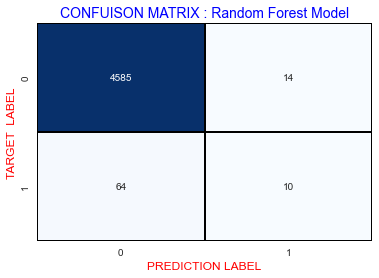

In [65]:
# Test cell containing Confusion matrix of Random Forest model before applying SMOTE.
# Confusion Matrix for report
# Using this cell we can see the improvement in our SMOTE approach.

#should this be using "data" instead of "dataset"?
#should this be using previously created variables?
    # descriptive_features = dataset.drop("TARGET",axis=1)
    # target_feature=dataset.TARGET
# X = data.drop('TARGET', axis=1)
# Y = data['TARGET']

train_descriptive_features, test_descriptive_features, train_target_feature, test_target_feature = train_test_split(descriptive_features, target_feature, test_size = 0.20)

model_1 = RandomForestClassifier(max_depth = 50)
model_1.fit(train_descriptive_features,train_target_feature)
model_1_prediction = model_1.predict(test_descriptive_features)

sns.heatmap(metrics.confusion_matrix(test_target_feature,model_1_prediction),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTION LABEL",fontsize=12,color='r')
plt.ylabel("TARGET  LABEL",fontsize=12,color='r')
plt.title("CONFUISON MATRIX : Random Forest Model",fontsize=14,color="b")
plt.show()

In [66]:
# Saving prediction scores in the form of a result dataset

model_scores_oversampledsampling=pd.DataFrame(model_scores_oversampled)

Text(0.5, 1.0, 'Classification Score Comparison for OverSampled Data')

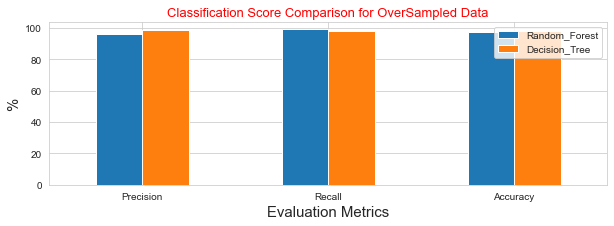

In [67]:
# Comparing classifiers

model_scores_oversampledsampling.plot(kind="bar",figsize=(10,3))
plt.xticks(rotation=(0))
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.ylabel("%",fontsize=15)
plt.title("Classification Score Comparison for OverSampled Data",fontsize=13,color="Red")

test_descriptive_features : 0.9965584640506705 


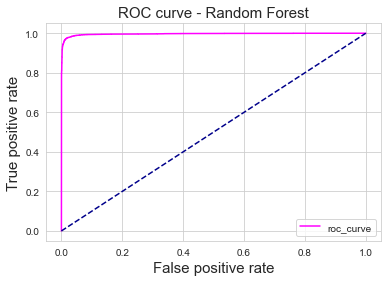

In [68]:
# Using ROC_AUC curve to measure performance 
# Using the Values of Random Forest Classifiers build using the SMOTE technique as this model 
# shows good scores compared to others

# Random Forest Model

test_target_feature_pred=random_model_oversampled.predict_proba(test_descriptive_features_oversampled)
print("test_descriptive_features : {} ".format(roc_auc_score(test_target_feature_oversampled,test_target_feature_pred[:,-1])))
test_target_feature_pred_ = test_target_feature_pred[:,-1]

fpr,tpr,thresholds = roc_curve(test_target_feature_oversampled,test_target_feature_pred_)

#plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='roc_curve',color='MAGENTA')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel("True positive rate",fontsize=15)
plt.xlabel("False positive rate",fontsize=15)
plt.title("ROC curve - Random Forest",fontsize=15)
plt.legend()
plt.show()

# Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels 
# (more no fraud than fraud transactions)

test_descriptive_features : 0.9831444837035798 


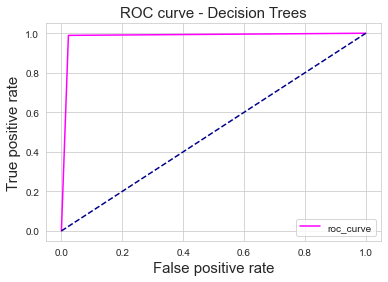

In [69]:
# Using ROC_AUC curve to measure performance 
# Using the Values of Random Forest Classifiers build using the SMOTE technique as this model 
# shows good scores compared to others

# Decision Tree model

test_target_feature_pred=tree_model.predict_proba(test_descriptive_features_oversampled)
print("test_descriptive_features : {} ".format(roc_auc_score(test_target_feature_oversampled,test_target_feature_pred[:,-1])))
test_target_feature_pred_ = test_target_feature_pred[:,-1]

fpr,tpr,thresholds = roc_curve(test_target_feature_oversampled,test_target_feature_pred_)

#plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='roc_curve',color='MAGENTA')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel("True positive rate",fontsize=15)
plt.xlabel("False positive rate",fontsize=15)
plt.title("ROC curve - Decision Trees",fontsize=15)
plt.legend()
plt.show()

# Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels 
# (more no fraud than fraud transactions)